This is the prototype for using Markov Chain and Monte Carlo method to predict ASX stock price.

In [4]:
#%matplotlib inline
# Import
from __future__ import division
import numpy as np
import quandl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

matplotlib.rcParams['figure.figsize'] = (16, 6)
ts = TimeSeries(key='Z8YBGA8971NL62IP', output_format='pandas', indexing_type='date')

In [13]:
ANZ, _ = ts.get_daily_adjusted(symbol='ANZ.AUS', outputsize='compact') # ANZ
NAB, _ = ts.get_daily_adjusted(symbol='NAB.AUS', outputsize='compact') # NAB
WOW, _ = ts.get_daily_adjusted(symbol='WOW.AUS', outputsize='compact') # Woolworths

WOW.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2018-12-10,28.74,28.81,27.98,28.40,27.9590,4513786.0,0.0,1.0
2018-12-11,28.52,28.56,28.28,28.47,28.0279,3550821.0,0.0,1.0
2018-12-12,28.29,28.67,28.21,28.49,28.0476,2263465.0,0.0,1.0
2018-12-13,28.37,28.56,28.15,28.31,27.8704,4041648.0,0.0,1.0
2018-12-16,28.40,28.70,28.27,28.64,28.1953,2623598.0,0.0,1.0


# Check candle stick chart

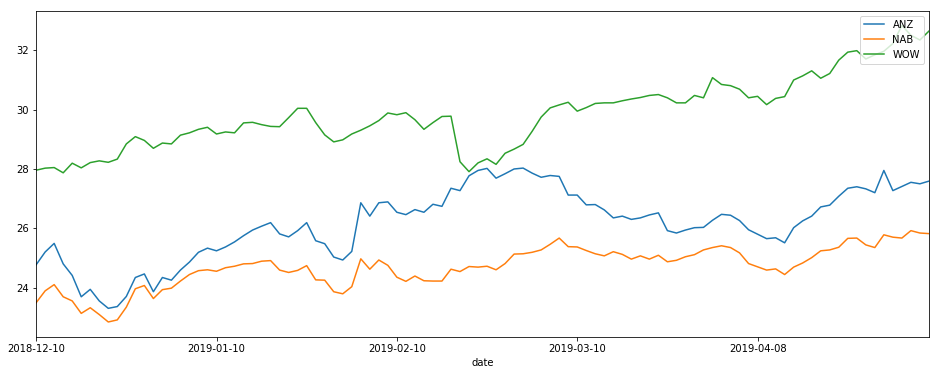

In [14]:
plt.figure(figsize=(16, 6))
ANZ['5. adjusted close'].plot()
NAB['5. adjusted close'].plot()
WOW['5. adjusted close'].plot()
plt.legend(['ANZ', 'NAB', 'WOW'], loc='upper right')

# Check volume

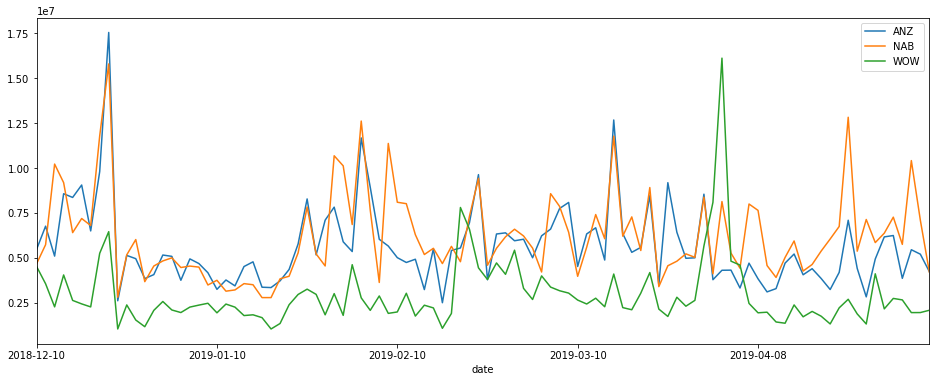

In [20]:
plt.figure(figsize=(16,6))
ANZ['6. volume'].plot()
NAB['6. volume'].plot()
WOW['6. volume'].plot()
plt.legend(['ANZ','NAB','WOW'],loc='upper right')

In [22]:
# check date of outlier
WOW['6. volume'].idxmax()

'2019-04-01'

# 交易总额

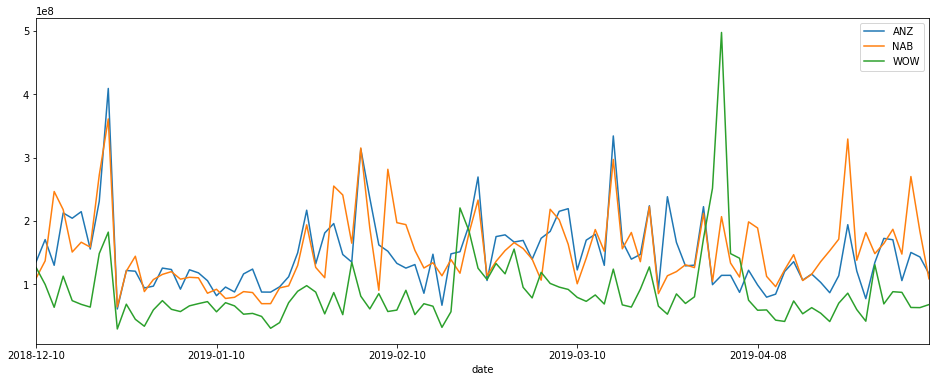

In [23]:
ANZ['Total Traded'] = ANZ['5. adjusted close'] * ANZ['6. volume']
NAB['Total Traded'] = NAB['5. adjusted close'] * NAB['6. volume']
WOW['Total Traded'] = WOW['5. adjusted close'] * WOW['6. volume']

plt.figure(figsize=(16, 6))
ANZ['Total Traded'].plot()
NAB['Total Traded'].plot()
WOW['Total Traded'].plot()
plt.legend(['ANZ', 'NAB', 'WOW'], loc='upper right')


In [24]:
WOW['Total Traded'].idxmax()

'2019-04-01'

# Check average moving


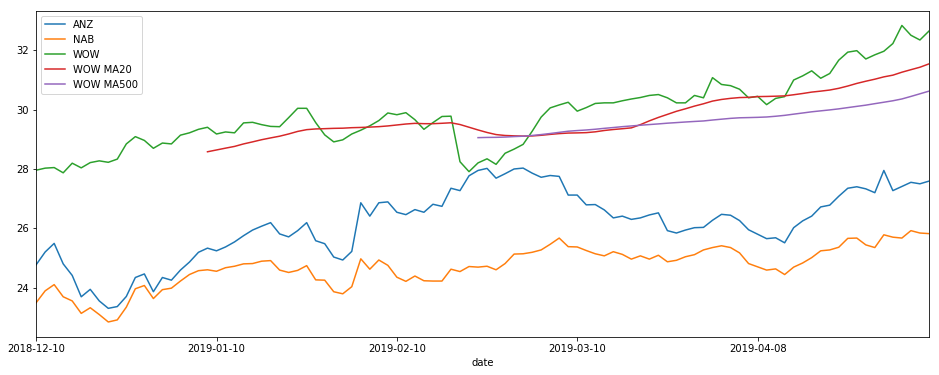

In [27]:
ANZ['5. adjusted close'].plot(label='ANZ')
NAB['5. adjusted close'].plot(label='NAB')

WOW['5. adjusted close'].plot(label='WOW')
WOW['5. adjusted close'].rolling(20).mean().plot(label='WOW MA20')
WOW['5. adjusted close'].rolling(50).mean().plot(label='WOW MA500')
plt.legend()

# 三只股票大概的相关关系

<Figure size 1152x432 with 0 Axes>

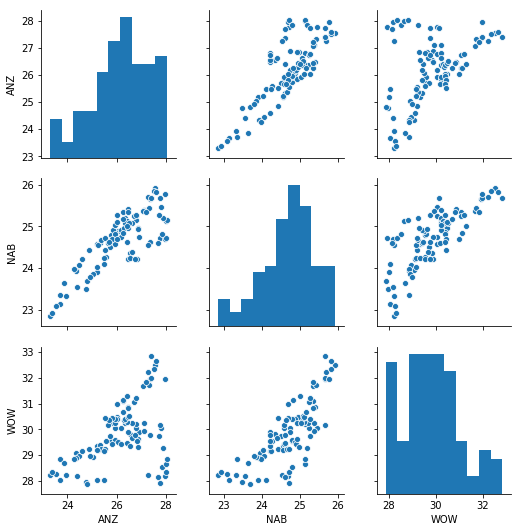

In [30]:
from pandas.plotting import scatter_matrix
import seaborn as sns

stockOpen = pd.DataFrame(columns=['ANZ', 'NAB', 'WOW'], index=WOW.index)
stockOpen['ANZ'] = ANZ['5. adjusted close']
stockOpen['NAB'] = NAB['5. adjusted close']
stockOpen['WOW'] = WOW['5. adjusted close']
plt.figure(figsize=(16,6))
sns.pairplot(stockOpen.dropna())

from the above chart, we know ANZ and NAB have related moving.

## Calculate daily return

In [33]:
# method 1: caculate manually
WOW['Return'] = (WOW['5. adjusted close'] - WOW['5. adjusted close'].shift(1)) / WOW['5. adjusted close'].shift(1)
WOW = WOW.dropna()

# method 2: use third party package ffn
import ffn
ANZ['Return'] = ffn.to_returns(ANZ['5. adjusted close'])

# method 3: pandas.pct_change
NAB['Return'] = NAB['5. adjusted close'].pct_change(1)
NAB = NAB.dropna()
WOW.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,Total Traded,Return
date,,,,,,,,,,
2018-12-12,28.29,28.67,28.21,28.49,28.0476,2263465.0,0.0,1.0,6.348476e+07,0.000703
2018-12-13,28.37,28.56,28.15,28.31,27.8704,4041648.0,0.0,1.0,1.126423e+08,-0.006318
2018-12-16,28.40,28.70,28.27,28.64,28.1953,2623598.0,0.0,1.0,7.397313e+07,0.011658
2018-12-17,28.70,28.75,28.43,28.48,28.0378,2429456.0,0.0,1.0,6.811660e+07,-0.005586
2018-12-18,28.38,28.68,28.35,28.66,28.2150,2261347.0,0.0,1.0,6.380391e+07,0.006320


In [ ]:
## Have a check hist of daily return 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  6.,  5.,  2.,  4.,  2.,  6.,  6.,  8., 11.,  8.,  8.,
         5.,  6.,  4.,  4.,  1.,  1.,  2.,  0.,  3.,  0.,  1.]),
 array([-0.051571  , -0.05009222, -0.04861343, -0.04713464, -0.04565585,
        -0.04417706, -0.04269827, -0.04121949, -0.0397407 , -0.03826191,
        -0.03678312, -0.03530433, -0.03382554, -0.03234675, -0.03086797,
        -0.02938918, -0.02791039, -0.0264316 , -0.02495281, -0.02347402,
        -0.02199523, -0.02051645, -0.01903766, -0.01755887, -0.01608008,
        -0.01460129, -0.0131225 , -0.01164371, -0.01016493, -0.00868614,
        -0.00720735, -0.00572856, -0.00424977, -0.00277098, -0.0012922 ,
         0.00018659,  0.00166538,  0.00314417,  0.00462296,  0.00610175,
         0.00758054,  0.00905932,  0.01053811,  0.0120169 ,  0.01349569,
         0.01497448,  0.01645327,  0.01793206,  0.01941084,

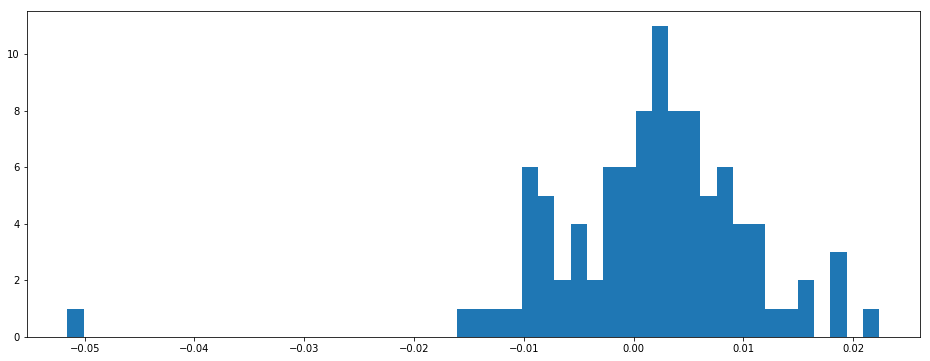

In [34]:
plt.figure(figsize=(16,6))
plt.hist(WOW['Return'],bins=50)

### kdeplot to check daily return 

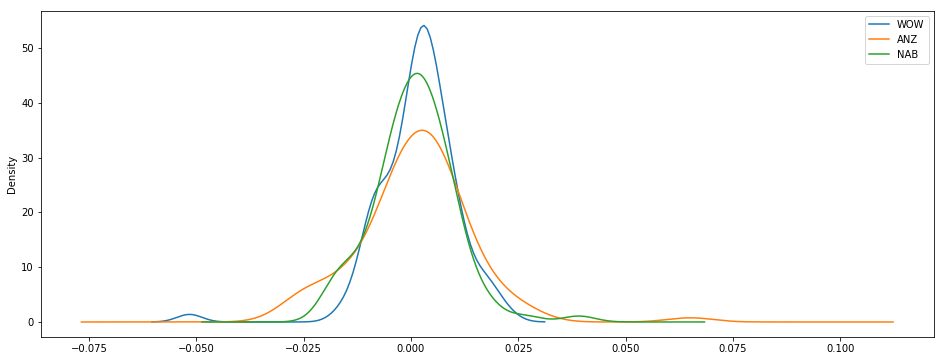

In [36]:
plt.figure(figsize=(16,6))
sns.kdeplot(WOW['Return'],label='WOW')
ANZ['Return'].plot(kind='kde',label='ANZ')
NAB['Return'].plot(kind='kde',label='NAB')
plt.legend()

### boxplot for daily return

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


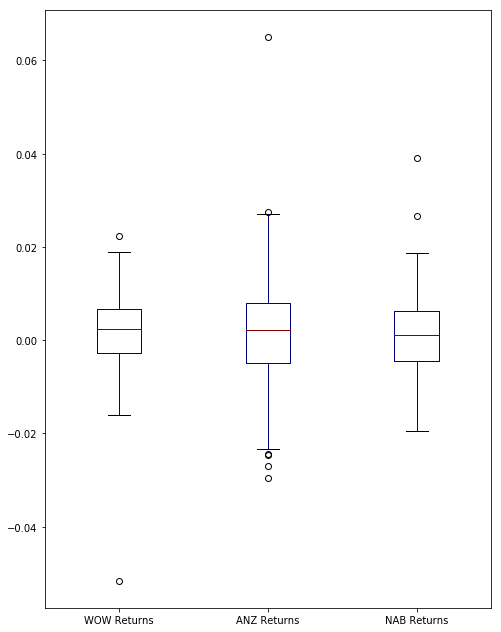

In [45]:
box_df = pd.concat([WOW['Return'], ANZ['Return'], NAB['Return']], axis=1)
box_df.columns = ['WOW Returns', 'ANZ Returns', 'NAB Returns']
box_df.plot(kind='box', figsize=(8, 11), colormap='jet')

# Calculate Cumulative Return

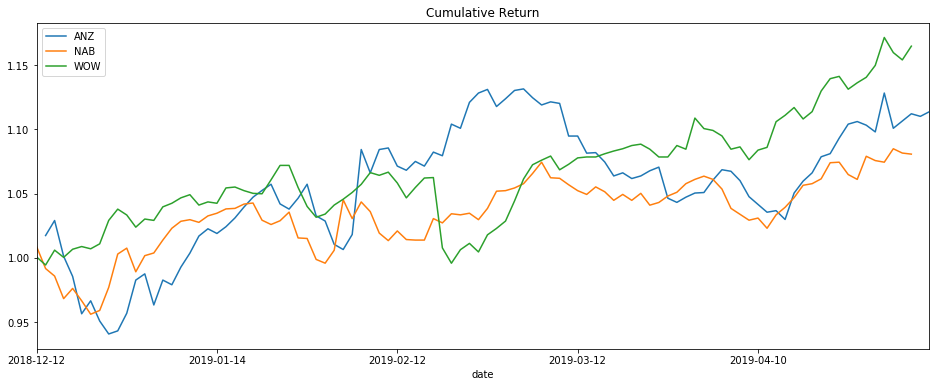

In [48]:
# 计算一下三只股票的累计收益率
ANZ['Cumulative Return'] = (1 + ANZ['Return']).cumprod()
NAB['Cumulative Return'] = (1 + NAB['Return']).cumprod()
WOW['Cumulative Return'] = (1 + WOW['Return']).cumprod()
ANZ['Cumulative Return'].plot(label='ANZ', title='Cumulative Return')
NAB['Cumulative Return'].plot(label='NAB')
WOW['Cumulative Return'].plot(label='WOW')
plt.legend()

In [49]:
ret_df = pd.concat([WOW['Return'], ANZ['Return'], NAB['Return']], axis=1)
ret_df.columns = ['WOW', 'ANZ', 'NAB']
ret_df.tail()

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,WOW,ANZ,NAB
2019-05-02,0.008133,-0.024329,-0.003103
2019-05-03,0.018926,0.005134,-0.001167
2019-05-06,-0.010049,0.005108,0.009739
2019-05-07,-0.004922,-0.001815,-0.003086
2019-05-08,0.009274,0.003273,-0.000774


In [ ]:
# Calculate Expected returns and Risk

In [50]:
print(ret_df.mean())
print(ret_df.std())

WOW    0.001603
ANZ    0.001177
NAB    0.000837
dtype: float64
WOW    0.009401
ANZ    0.013300
NAB    0.009419
dtype: float64


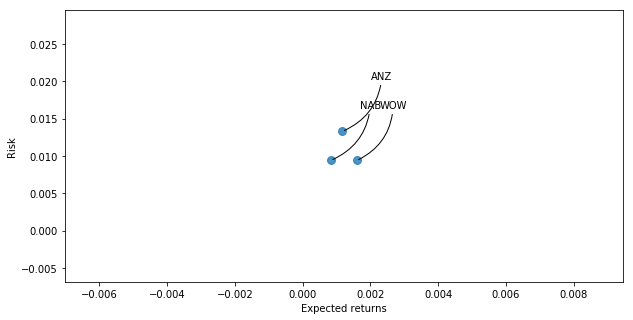

In [51]:
plt.figure(figsize=(10, 5))
area = np.pi * 20
plt.scatter(ret_df.mean(), ret_df.std(), alpha=0.8, s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(ret_df.columns, ret_df.mean(), ret_df.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(50, 50),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 arrowprops=dict(arrowstyle='-',
                                 connectionstyle='arc3,rad=-0.3'))

In [53]:
# Set up our time horizon
days = 30
# Now our delta
dt = 1 / days
# Now let's grab our mu (drift) from the expected return data we got for WOW
mu = ret_df.loc['2018-12-10':'2019-05-07'].mean()['WOW']
# Now let's grab the volatility of the stock from the std() of the average return
sigma = ret_df.std()['WOW']
print(mu, sigma)

0.0015238928037383545 0.009401398522763062


In [54]:
def stock_monte_carlo(start_price, days, mu, sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    return price

# Monte Carlo experiments for Woolworths

Text(0.5, 1.0, 'Monte Carlo Analysis for Woolworths')

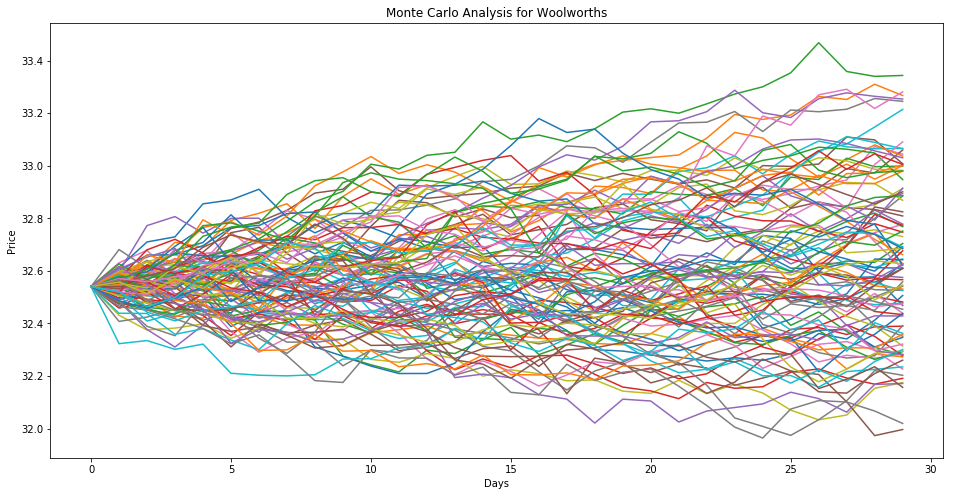

In [57]:
plt.figure(figsize=(16, 8))
start_price = WOW['1. open'][-1]

# simulate 100 times
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Woolworths')

# Then simulate 10000 times

In [58]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

# Draw distribution diagram for  Confidence level 99%


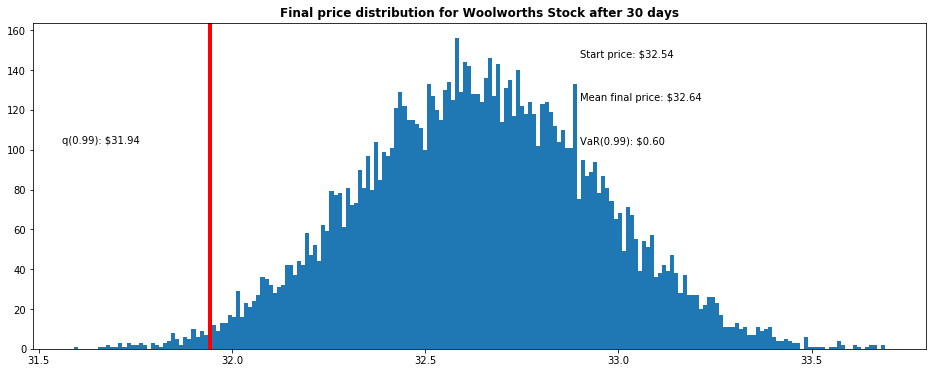

In [59]:
plt.figure(figsize=(16,6))
#define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Woolworths Stock after %s days" % days, weight='bold');

### We have 99% confidence WOW's price will not less than 31.94, and risk is 0.6

# ANZ

In [66]:
# Set up our time horizon
days = 365
# Now our delta
dt = 1 / days
# Now let's grab our mu (drift) from the expected return data we got for ANZ
mu_anz = ret_df.loc['2018-12-10':'2019-05-07'].mean()['ANZ']
# Now let's grab the volatility of the stock from the std() of the average return
sigma_anz = ret_df.std()['ANZ']
print(mu_anz, sigma_anz)

0.001155182667139342 0.013299547163323612


ANZ start price 27.38


Text(0.5, 1.0, 'Monte Carlo Analysis for ANZ')

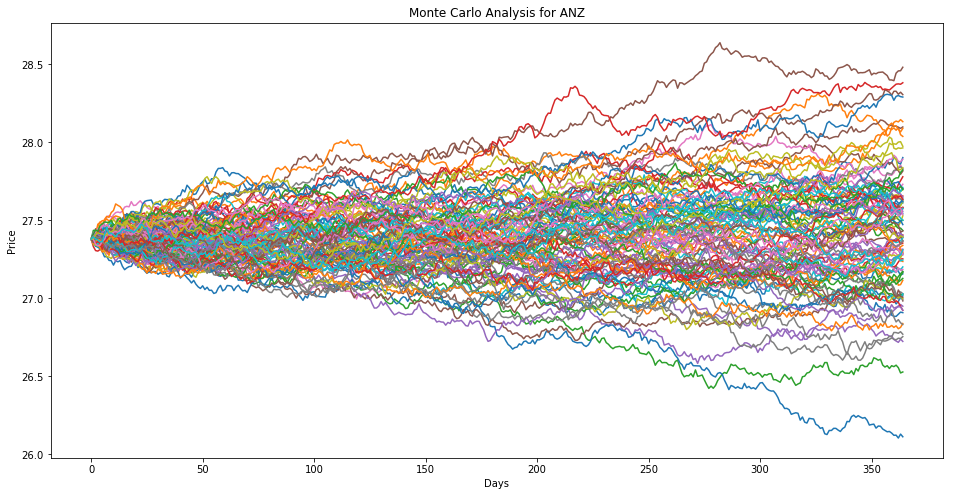

In [67]:
plt.figure(figsize=(16, 8))
start_price_anz = ANZ['1. open'][-1]
print('ANZ start price', start_price_anz)

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_anz, days, mu_anz, sigma_anz))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for ANZ')

In [68]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulation_anz = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulation_anz[run] = stock_monte_carlo(start_price_anz,days,mu_anz,sigma_anz)[days-1];

## Draw distribution diagram for  Confidence level 99%


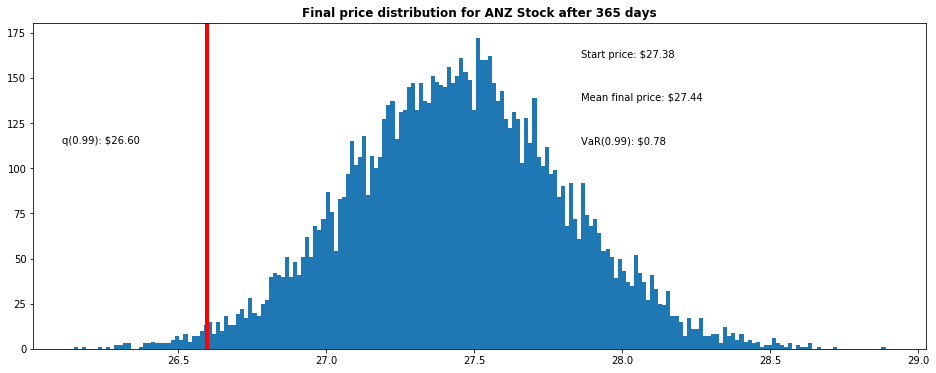

In [69]:
plt.figure(figsize=(16,6))
#define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulation_anz, 1)

# plot the distribution of the end prices
plt.hist(simulation_anz,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_anz)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation_anz.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_anz - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for ANZ Stock after %s days" % days, weight='bold');

### We have 99% confidence ANZ's price will not less than 26.60, and risk is 0.78

# NAB

In [60]:
# Set up our time horizon
days = 30

# Now our delta
dt = 1 / days

# Now let's grab our mu (drift) from the expected return data we got for NAB
mu_nab = ret_df.loc['2018-12-10':'2019-05-07'].mean()['NAB']

# Now let's grab the volatility of the stock from the std() of the average return
sigma_nab = ret_df.std()['NAB']
print(mu_nab, sigma_nab)

0.0008534025284160397 0.009419429445370074


NAB start price 25.7


Text(0.5, 1.0, 'Monte Carlo Analysis for NAB')

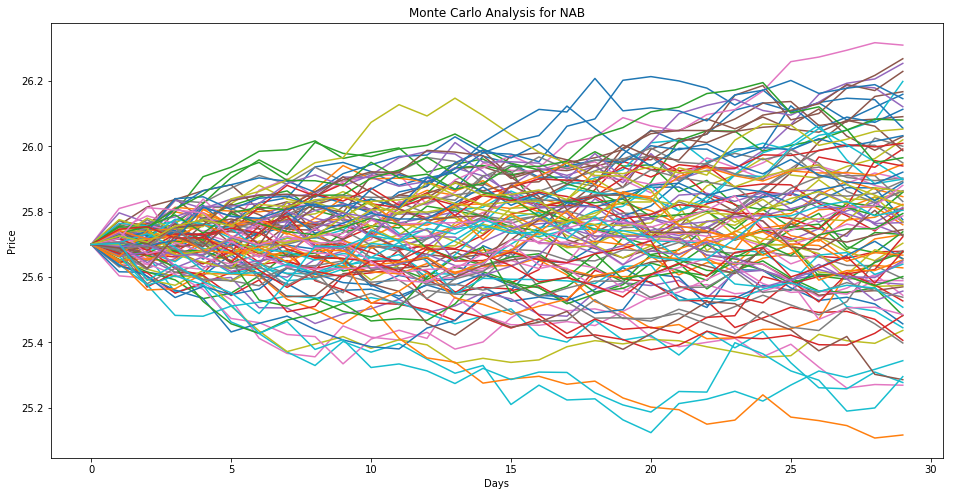

In [61]:
plt.figure(figsize=(16, 8))
start_price_nab = NAB['1. open'][-1]
print('NAB start price', start_price_nab)

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_nab, days, mu_nab, sigma_nab))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for NAB')

In [64]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulation_nab = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulation_nab[run] = stock_monte_carlo(start_price_nab,days,mu_nab,sigma_nab)[days-1];

## Draw distribution diagram for  Confidence level 99%


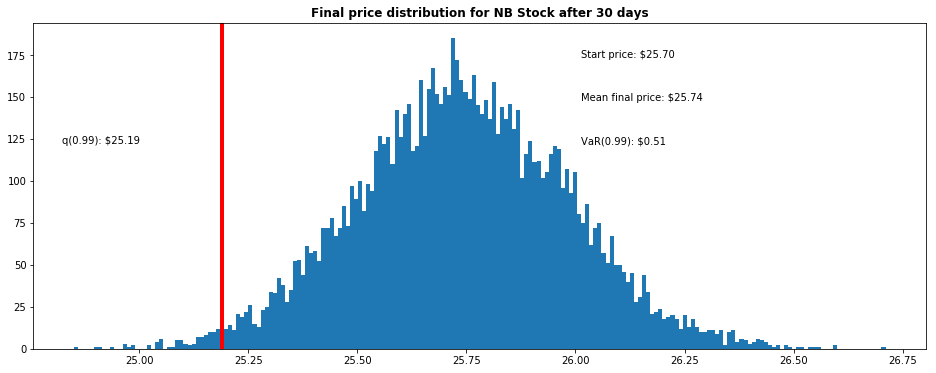

In [63]:
plt.figure(figsize=(16,6))
#define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulation_nab, 1)

# plot the distribution of the end prices
plt.hist(simulation_nab,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_nab)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation_nab.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_nab - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for NB Stock after %s days" % days, weight='bold');

### We have 99% confidence NAB's price will not less than 25.19, and risk is 0.51